<a href="https://colab.research.google.com/github/AdarshShah/final-year-project/blob/master/notebooks/sepsis_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math
import pandas as pd
import psycopg2
import getpass
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score
from keras.models import Model, Sequential
from keras.layers import Dense, LeakyReLU
import matplotlib.pyplot as plt

In [0]:
path = '/home/adarsh/Documents/sepsis/dataset/dataset_sepsis.csv'
sepsis_dataset = pd.read_csv(path)

In [0]:
sepsis = sepsis_dataset[sepsis_dataset['sepsis_explicit']==1]
not_sepsis = sepsis_dataset[sepsis_dataset['sepsis_explicit']!=1]

In [4]:
sepsis['icustay_id'].count()

1538

In [5]:
not_sepsis['icustay_id'].count()

14000

In [0]:
X = sepsis_dataset.iloc[:,6:-2]
Y = sepsis_dataset.iloc[:,3]
X = MinMaxScaler().fit_transform(X.values)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [0]:
model = Sequential()
model.add(Dense(units=128,input_shape=(94,),activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=16,activation='relu'))
model.add(Dense(units=4,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

In [0]:
history = model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=50)

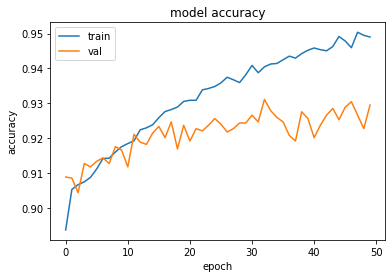

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
X = sepsis_dataset.iloc[:,6:-2]
y_true = sepsis_dataset.iloc[:,3]
X = MinMaxScaler().fit_transform(X.values)
y_pred = model.predict(X)
y_pred = np.round(y_pred)
print(confusion_matrix(y_true,y_pred))
print("f1_score\t:%f"%(f1_score(y_true,y_pred)))
print("recall_score\t:%f"%(recall_score(y_true,y_pred)))
print("precision_score\t:%f"%(precision_score(y_true,y_pred)))

[[13904    96]
 [  732   806]]
f1_score	:0.660656
recall_score	:0.524057
precision_score	:0.893570


In [17]:
y_pred = sepsis_dataset['sepsis-3']
y_true = sepsis_dataset.iloc[:,3]
print(confusion_matrix(y_true,y_pred))
print("f1_score\t:%f"%(f1_score(y_true,y_pred)))
print("recall_score\t:%f"%(recall_score(y_true,y_pred)))
print("precision_score\t:%f"%(precision_score(y_true,y_pred)))

[[6292 7708]
 [  56 1482]]
f1_score	:0.276286
recall_score	:0.963589
precision_score	:0.161262
